#RAVITEJA Y S - 213010042
#SHREYAS G S - 213010040


#**Clustering:** 

a) Visualize and pre-process the data as appropriate from the file DataClustering.csv. 
You might have to use a power, an exponential, or a log transformation.
b) Train k-means, and find the appropriate number of k.
c) Using the cluster assignment as the label, visualize the t-sne embedding.


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

We have imported the required libraries and now we will be
Importing the Data Set Into Our Python Script

In [ ]:
raw_data = pd.read_csv('/content/DataClustering.csv')

In [ ]:
raw_data

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825
...,...,...,...,...
346,0.203877,0.195724,2.766999,1.826532
347,0.229380,0.131514,0.704255,2.762919
348,0.095878,0.107426,0.946789,3.434620
349,0.111690,0.130970,1.098922,2.295701


In [ ]:
print(raw_data.columns)

Index(['x1', 'x2', 'x3', 'x4'], dtype='object')


Since this is a clustered data set, we have no idea what any of these columns means. For now, it is sufficient to recognize that every column is numerical in nature and thus well-suited for modelling with machine learning techniques.

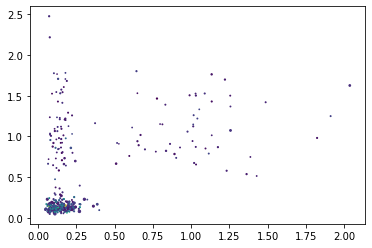

In [ ]:
plt.scatter(raw_data['x1'],raw_data['x2'],raw_data['x3'],raw_data['x4'])

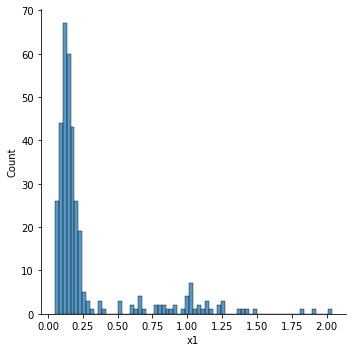

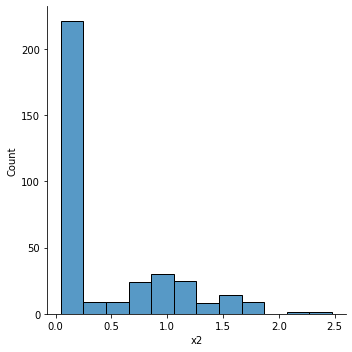

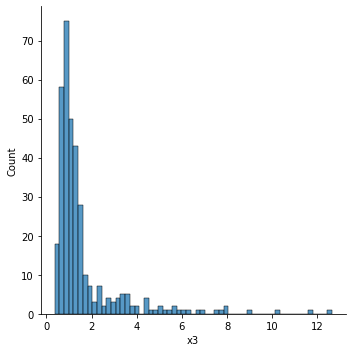

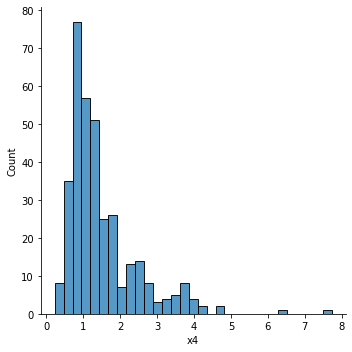

In [ ]:
for column in raw_data:
  sns.displot(x=column, data=raw_data)

As we can see that its a positive skewed data and have to convert it into the normal distributed data. We can do that by using the log transformation.

#Performing the log trnsformation to convert the positive skewed data to normal distributed data

In [ ]:
inp_data = raw_data

In [ ]:
out_data = np.log10(inp_data)
out_data

,x1,x2,x3,x4
0,-0.079692,0.142836,-0.016723,-0.002757
1,0.099020,0.176232,-0.043775,-0.131923
2,-0.010126,0.024701,0.085480,0.132656
3,0.006194,0.050257,0.077675,-0.006941
4,0.017612,0.086009,-0.063075,0.235737
...,...,...,...,...
346,-0.690632,-0.708356,0.442009,0.261627
347,-0.639444,-0.881028,-0.152270,0.441368
348,-1.018283,-0.968889,-0.023747,0.535879
349,-0.951987,-0.882830,0.040967,0.360915


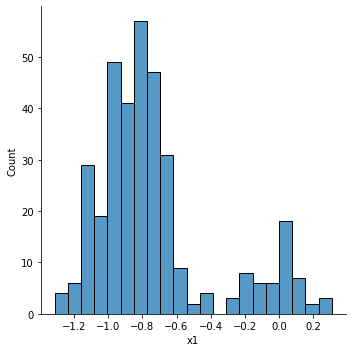

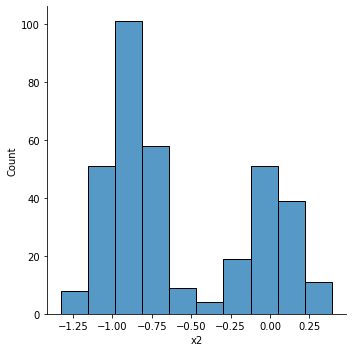

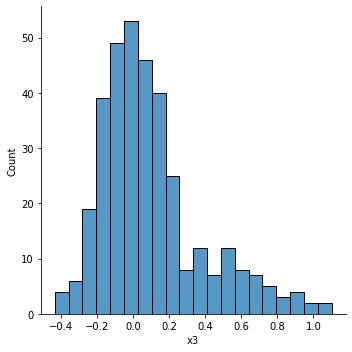

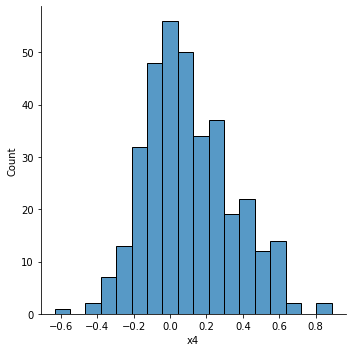

In [ ]:
for column in out_data:
  sns.displot(x=column, data=out_data)

As now we can see that the data has been converted into a normal distributed data from the positive skewed data using the log transformation as we can see from the plots.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


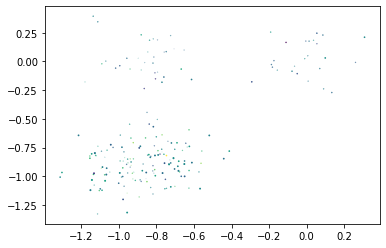

In [ ]:
plt.scatter(out_data['x1'],out_data['x2'],out_data['x3'],out_data['x4'])

As we can compare the scatter plot of the raw data and the out_data, after performing the log transformations the data is properly normal distributed and we can use this data to perform the futher TRAINING of the k-means

In [ ]:
scaler = MinMaxScaler()
scaler.fit(out_data[['x1']])
out_data['x1'] = scaler.transform(out_data[['x1']])

scaler.fit(out_data[['x2']])
out_data['x2'] = scaler.transform(out_data[['x2']])

scaler.fit(out_data[['x3']])
out_data['x3'] = scaler.transform(out_data[['x3']])

scaler.fit(out_data[['x4']])
out_data['x4'] = scaler.transform(out_data[['x4']])

#Now we are gonna train K-means

In [ ]:
km = KMeans()
y_predicted = km.fit_predict(out_data[['x1','x2','x3','x4']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 7, 1, 1, 7, 1, 1, 1, 7, 1, 7, 7, 7,
       7, 7, 7, 1, 1, 7, 1, 1, 7, 7, 1, 7, 7, 0, 7, 1, 7, 7, 7, 1, 2, 7,
       7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 1, 7, 7, 1,
       7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 1, 7, 3, 5, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 5, 3, 3, 0, 3, 3, 3, 5, 3, 3, 5, 3, 0, 3, 3, 4, 3, 3, 5, 3,
       3, 3, 5, 3, 3, 3, 3, 3, 0, 4, 3, 5, 0, 3, 3, 3, 3, 3, 0, 3, 0, 5,
       5, 3, 3, 3, 0, 0, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 5, 3, 3, 3, 3, 3, 4, 3, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 0, 6,
       0, 5, 6, 6, 0, 6, 6, 0, 5, 6, 6, 5, 0, 6, 6, 0, 0, 6, 6, 6, 6, 5,
       5, 0, 6, 0, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5,

In [ ]:
out_data['cluster'] = y_predicted
out_data

,x1,x2,x3,x4,cluster
0,0.760403,0.854232,0.271967,0.414538,2
1,0.870559,0.873632,0.254356,0.329642,2
2,0.803283,0.785607,0.338502,0.503540,2
3,0.813342,0.800453,0.333421,0.411788,2
4,0.820380,0.821221,0.241792,0.571291,2
...,...,...,...,...,...
346,0.383825,0.359775,0.570605,0.588308,0
347,0.415377,0.259471,0.183725,0.706445,6
348,0.181864,0.208432,0.267394,0.768563,6
349,0.222729,0.258424,0.309523,0.653566,6


We are using the min max scaler to perform the scaling in order to not to have any issues while plotting the scatter plot where uou can see. It is scaled the values

In [ ]:
km.cluster_centers_

array([[0.38572899, 0.3133395 , 0.33541376, 0.56359359],
       [0.31068389, 0.77209969, 0.34166449, 0.31653363],
       [0.79636277, 0.78129183, 0.29806245, 0.40095764],
       [0.28309695, 0.26282775, 0.26398524, 0.37080177],
       [0.28721384, 0.24657477, 0.71518454, 0.42656139],
       [0.14538583, 0.21346157, 0.36160247, 0.56548919],
       [0.26442638, 0.24450427, 0.25217157, 0.74367134],
       [0.24945689, 0.79281572, 0.23460852, 0.47633065]])

Now let us visualize the the data using the different cluster points from 0,1,2 etc

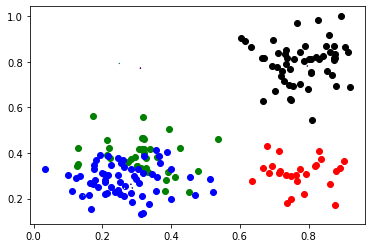

In [ ]:
df1 = out_data[out_data.cluster==0]
df2 = out_data[out_data.cluster==1]
df3 = out_data[out_data.cluster==2]
df4 = out_data[out_data.cluster==3]

plt.scatter(df1.x2,df1['x1'],color='green')
plt.scatter(df2.x2,df2['x1'],color='red')
plt.scatter(df3.x2,df3['x1'],color='black')
plt.scatter(df4.x2,df4['x1'],color='blue')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3],marker='*',label='centroid')

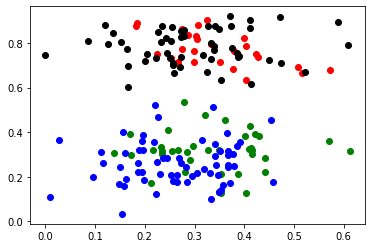

In [ ]:
plt.scatter(df1.x3,df1['x2'],color='green')
plt.scatter(df2.x3,df2['x2'],color='red')
plt.scatter(df3.x3,df3['x2'],color='black')
plt.scatter(df4.x3,df4['x2'],color='blue')

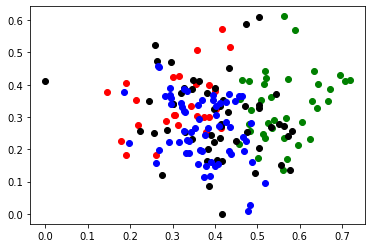

In [ ]:
plt.scatter(df1.x4,df1['x3'],color='green')
plt.scatter(df2.x4,df2['x3'],color='red')
plt.scatter(df3.x4,df3['x3'],color='black')
plt.scatter(df4.x4,df4['x3'],color='blue')

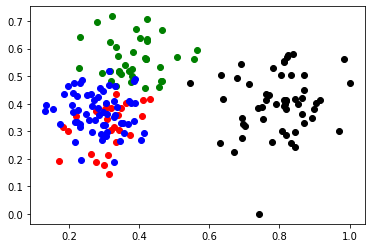

In [ ]:
plt.scatter(df1.x1,df1['x4'],color='green')
plt.scatter(df2.x1,df2['x4'],color='red')
plt.scatter(df3.x1,df3['x4'],color='black')
plt.scatter(df4.x1,df4['x4'],color='blue')

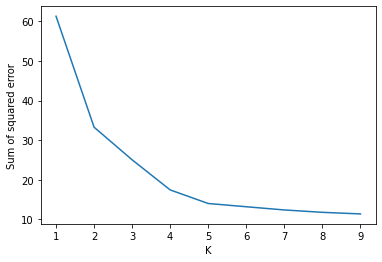

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(out_data[['x1','x2','x3','x4']])
  sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

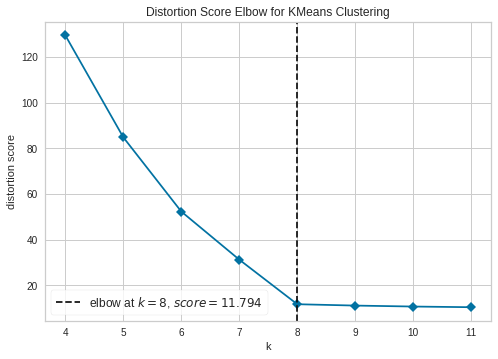

In [ ]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(4,12), timings=False)
visualizer.fit(out_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

I have used the elbow method which is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

From this graph it is evident that the elbow curve gives the number of clusters required and for our case it is **K = 8**. 

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)

We will create a T-sne Model with learning rate 50 fitting to the data to t-sne. different configuration and evaluate these with an internal cost function. High learning rate will cause algorithm to be more adventurous in the configuration it price out while Low learning rates will cost to be more conservative. 
Usually learning rates fall in 10 to 1000 range.

In [ ]:
tsne_features = m.fit_transform(out_data)
tsne_features

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


array([[-2.20992966e+01,  5.57661057e+00],
       [-2.13321514e+01,  5.73709822e+00],
       [-2.21947079e+01,  5.86490154e+00],
       [-2.16678619e+01,  5.30066919e+00],
       [-2.29111271e+01,  6.42533207e+00],
       [-2.29715157e+01,  4.13388014e+00],
       [-2.06956062e+01,  5.14462328e+00],
       [-2.08616848e+01,  4.17787933e+00],
       [-2.37964592e+01,  4.79347134e+00],
       [-2.08170261e+01,  4.20216131e+00],
       [-2.30308990e+01,  5.00978088e+00],
       [-2.04340477e+01,  3.99159575e+00],
       [-2.22996941e+01,  6.02866125e+00],
       [-2.19134064e+01,  6.92164993e+00],
       [-2.24421120e+01,  4.84972525e+00],
       [-2.30095253e+01,  3.77961040e+00],
       [-2.17424297e+01,  3.28651881e+00],
       [-2.29408131e+01,  4.62113047e+00],
       [-2.05627880e+01,  5.77406502e+00],
       [-2.07324886e+01,  5.39805174e+00],
       [-2.26051579e+01,  6.91171598e+00],
       [-2.20290852e+01,  6.39655924e+00],
       [-2.13280067e+01,  4.72595978e+00],
       [-2.

In [ ]:
out_data['x'] = tsne_features[:,0]
out_data['y'] = tsne_features[:,1]

<function matplotlib.pyplot.show>

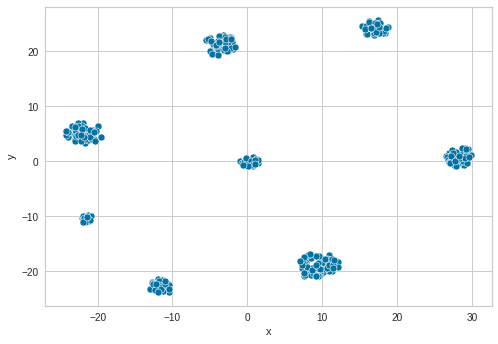

In [ ]:
import seaborn as sns
sns.scatterplot(x='x',y='y',data=out_data)
plt.show

From this plot we can clearly see how all the samples are nicely spaced apart and grouped together with their respective digits. This could be an amazing starting point to then use a clustering algorithm and try to identify the clusters or to actually use these two dimensions as input to another algorithm

**References:**


for log transformation - https://www.youtube.com/watch?v=YCwRd-N3D14

for the elbow curves: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

https://towardsdatascience.com/are-you-solving-ml-clustering-problems-using-k-means-68fb4efa5469

https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

https://www.youtube.com/watch?v=85XaciPBCkw